In [58]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [59]:
import sqlite3
import pandas as pd

In [60]:
# create sqlite connection and cursor
# and attached needed databases, created if they do not exist
Con = sqlite3.connect('')
Cur = Con.cursor()
Cur.execute("ATTACH DATABASE 'hedgefund.db' AS hedgefund")
Cur.execute("ATTACH DATABASE 'rfasset.db' AS rfasset")
pd.DataFrame(Cur.execute('pragma database_list').fetchall()) #list db

,0,1,2
0,0,main,
1,2,hedgefund,/Users/emilyziyixiao/DataspellProjects/AdvDsFi...
2,3,rfasset,/Users/emilyziyixiao/DataspellProjects/AdvDsFi...


In [61]:
# Load data from data.xlsx into pandas dataframes
hedgefund_df = pd.read_excel('data.xlsx', sheet_name='HedgeFund', header=1, skiprows=[30, 31])
rfasset_df = pd.read_excel('data.xlsx', sheet_name='RiskFreeAsset',header=1)

In [139]:
hedgefund_df = hedgefund_df.rename(columns={hedgefund_df.columns[0]: "Year"})
hedgefund_df["Year"] = hedgefund_df["Year"].astype(int)
hedgefund_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
0,1997,0.0362,0.0118,-0.0099,0.0049,0.0406,0.0311,0.0470,0.0052,0.0405,-0.0127,-0.0019,0.0129,22.35%
1,1998,-0.0019,0.0376,0.0354,0.0115,-0.0168,0.0023,-0.0046,-0.0781,0.0105,0.0217,0.0378,0.0295,8.23%
2,1999,0.0223,-0.0084,0.0348,0.0492,0.0115,0.0413,0.0082,0.0032,0.0074,0.0190,0.0533,0.0773,36.56%
3,2000,0.0095,0.0676,0.0174,-0.0147,-0.0100,0.0326,0.0006,0.0374,-0.0071,-0.0107,-0.0252,0.0220,12.19%
4,2001,0.0304,-0.0144,-0.0111,0.0202,0.0147,0.0051,-0.0057,-0.0018,-0.0258,0.0184,0.0202,0.0171,6.77%


In [66]:
rfasset_df.head()

,Date,RF
0,192607,0.22
1,192608,0.25
2,192609,0.23
3,192610,0.32
4,192611,0.31


In [68]:
hedgefund_df.to_sql('hf_wide', Con, if_exists='replace')
rfasset_df.to_sql('rf_long', Con, if_exists='replace')

Part A

[a]

In [168]:
# Load the data from the Excel file into pandas dataframes
hedgefund_df = pd.read_excel('data.xlsx', sheet_name='HedgeFund', header=1, index_col=None)
hedgefund_df = hedgefund_df[:-3]
hedgefund_df = hedgefund_df.rename(columns={hedgefund_df.columns[0]: "Year"})
hedgefund_df["Year"] = hedgefund_df["Year"].astype(int)
hedgefund_df['YTD'] = hedgefund_df['YTD'].astype(str).str.strip('%').astype(float) / 100

# Connect to the databases and create the tables
conn_hedge = sqlite3.connect("hedgefund.db")
hedgefund_df.to_sql("hf_wide", conn_hedge, if_exists="replace", index=False)

# Query the data to make sure it was stored correctly
print(pd.read_sql_query("SELECT * FROM hf_wide", conn_hedge))

    Year     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0   1997  0.0362  0.0118 -0.0099  0.0049  0.0406  0.0311  0.0470  0.0052   
1   1998 -0.0019  0.0376  0.0354  0.0115 -0.0168  0.0023 -0.0046 -0.0781   
2   1999  0.0223 -0.0084  0.0348  0.0492  0.0115  0.0413  0.0082  0.0032   
3   2000  0.0095  0.0676  0.0174 -0.0147 -0.0100  0.0326  0.0006  0.0374   
4   2001  0.0304 -0.0144 -0.0111  0.0202  0.0147  0.0051 -0.0057 -0.0018   
5   2002  0.0066 -0.0048  0.0187  0.0062  0.0038 -0.0149 -0.0224  0.0059   
6   2003  0.0053  0.0009  0.0012  0.0253  0.0323  0.0135  0.0116  0.0166   
7   2004  0.0181  0.0114  0.0065 -0.0122 -0.0044  0.0070 -0.0085  0.0012   
8   2005  0.0012  0.0202 -0.0086 -0.0153  0.0085  0.0152  0.0229  0.0106   
9   2006  0.0350  0.0061  0.0197  0.0173 -0.0184 -0.0039  0.0002  0.0096   
10  2007  0.0113  0.0079  0.0091  0.0159  0.0200  0.0072  0.0037 -0.0145   
11  2008 -0.0326  0.0123 -0.0238  0.0193  0.0182 -0.0173 -0.0210 -0.0121   
12  2009 -0.

[b]

In [169]:
rfasset_df = pd.read_excel('data.xlsx', sheet_name='RiskFreeAsset',header=1, index_col=None)
rfasset_df['RF'] = rfasset_df['RF'] / 100

conn_rf = sqlite3.connect("rfasset.db")
rfasset_df.to_sql('rf_long', conn_rf, if_exists='replace', index=False)

print(pd.read_sql_query("SELECT * FROM rf_long", conn_rf))

        Date      RF
0     192607  0.0022
1     192608  0.0025
2     192609  0.0023
3     192610  0.0032
4     192611  0.0031
...      ...     ...
1152  202207  0.0008
1153  202208  0.0019
1154  202209  0.0019
1155  202210  0.0023
1156  202211  0.0029

[1157 rows x 2 columns]


In [100]:
long_hedgefund_df = pd.melt(hedgefund_df, id_vars='Year', value_vars=hedgefund_df.columns[1:], var_name='month', value_name='value')

long_hedgefund_df['datetime'] = pd.to_datetime(long_hedgefund_df['Year'].astype(str) + long_hedgefund_df['month'], format='%Y%B')

long_hedgefund_df['datetime'] = long_hedgefund_df['datetime'].dt.strftime('%Y%m')

print(long_hedgefund_df)

ValueError: time data '1997.0Jan' does not match format '%Y%B' (match)

In [96]:
long_hedgefund_df = pd.melt(hedgefund_df, id_vars='Year', value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], var_name='month', value_name='value')
print(long_hedgefund_df)

       Year month   value
0    1997.0   Jan  0.0362
1    1998.0   Jan -0.0019
2    1999.0   Jan  0.0223
3    2000.0   Jan  0.0095
4    2001.0   Jan  0.0304
..      ...   ...     ...
307  2018.0   Dec -0.0275
308  2019.0   Dec  0.0167
309  2020.0   Dec  0.0344
310  2021.0   Dec  0.0119
311  2022.0   Dec -0.0133

[312 rows x 3 columns]


In [258]:
# Reshape data from wide to long format
long_hedgefund_df = pd.melt(hedgefund_df, id_vars='Year', value_vars=hedgefund_df.columns[1:], var_name='Month', value_name='Ret')

#long_format_data = pd.melt(wide_format_data, id_vars='year', value_vars=wide_format_data.columns[1:], var_name='month', value_name='value')

# Fill NaN values in the 'Year' column
#long_hedgefund_df['Year'].fillna(long_hedgefund_df['Year'].mean(), inplace=True)
long_hedgefund_df['Month'].dropna()

# Combine 'Year' and 'Month' into a single column
long_hedgefund_df['YearMonth'] = long_hedgefund_df['Year'].astype(int).astype(str) + long_hedgefund_df['Month'].astype(str)
long_hedgefund_df = long_hedgefund_df[long_hedgefund_df['Month'] != 'YTD']

long_hedgefund_df['Date'] = pd.to_datetime(long_hedgefund_df['YearMonth'], format='%Y%b')
long_hedgefund_df['Date'] = long_hedgefund_df['Date'].dt.strftime('%Y%m')
long_hedgefund_df = long_hedgefund_df.drop(['YearMonth'], axis=1)

long_hedgefund_df['Month'] = pd.to_datetime(long_hedgefund_df['Month'], format='%b').dt.month
#hedgefund_df = hedgefund_df.drop(['Month'], axis=1)

# Convert the combined 'Date' column to datetime format
#long_hedgefund_df['Date'] = pd.to_datetime(long_hedgefund_df['Date'], format='%Y%B')

# Reorder columns and reset index
#long_hedgefund_df = long_hedgefund_df[['Date', 'Ret']]
long_hedgefund_df = long_hedgefund_df.reset_index(drop=True)
long_hedgefund_df = long_hedgefund_df[['Year','Month','Ret','Date']]

# Sort data by Year
long_hedgefund_df.sort_values(by='Date', inplace=True)

# Show final result
long_hedgefund_df

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
333    YTD
334    YTD
335    YTD
336    YTD
337    YTD
Name: Month, Length: 338, dtype: object

,Year,Month,Ret,Date
0,1997,1,0.0362,199701
26,1997,2,0.0118,199702
52,1997,3,-0.0099,199703
78,1997,4,0.0049,199704
104,1997,5,0.0406,199705
...,...,...,...,...
207,2022,8,-0.0038,202208
233,2022,9,-0.0394,202209
259,2022,10,0.0186,202210
285,2022,11,0.0292,202211


In [259]:
# Connect to the databases and create the tables
conn_out = sqlite3.connect("output.db")
long_hedgefund_df.to_sql("hf_long", conn_out, if_exists="replace", index=False)

# Query the data to make sure it was stored correctly
print(pd.read_sql_query("SELECT * FROM hf_long", conn_out))

     Year  Month     Ret    Date
0    1997      1  0.0362  199701
1    1997      2  0.0118  199702
2    1997      3 -0.0099  199703
3    1997      4  0.0049  199704
4    1997      5  0.0406  199705
..    ...    ...     ...     ...
307  2022      8 -0.0038  202208
308  2022      9 -0.0394  202209
309  2022     10  0.0186  202210
310  2022     11  0.0292  202211
311  2022     12 -0.0133  202212

[312 rows x 4 columns]


In [261]:
match_RF = []
for i, rowi in long_hedgefund_df.iterrows():
    #print(rowi['Date'])
    for j, rowj in rfasset_df.iterrows():
        #print(rowj['Date'])
        if int(rowi['Date']) == rowj['Date']:
            match_RF.append(rowj['RF'])
            #print(rowj['RF'])
match_RF.append(0)

In [263]:
merged_df = long_hedgefund_df
merged_df['RF'] = match_RF
merged_df.head()

,Year,Month,Ret,Date,RF
0,1997,1,0.0362,199701,0.0045
26,1997,2,0.0118,199702,0.0039
52,1997,3,-0.0099,199703,0.0043
78,1997,4,0.0049,199704,0.0043
104,1997,5,0.0406,199705,0.0049


In [264]:
merged_df.to_sql("merged", conn_out, if_exists="replace", index=False)

In [265]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('output.db')

# Task [a]: Estimating the Sharpe ratio
# Get the merged data from the database
merged = pd.read_sql_query("SELECT * FROM merged", conn)

# Calculate the Sharpe ratio
sharpe_ratio = np.mean(merged['Ret'] - merged['RF']) / np.std(merged['Ret']) * np.sqrt(12)
print("The estimated Sharpe ratio is: ", sharpe_ratio)

The estimated Sharpe ratio is:  0.8013146984726371


In [266]:
# Task [b]: Line graph of $1,000 invested in the Barclay Hedge Fund Index

cumulative_return = []
current = 1000
for i, rowi in merged.iterrows():
    current = current * (1 + rowi['Ret'])
    cumulative_return.append(current)
return_df = pd.DataFrame(cumulative_return, columns=['cumulative_return'])
return_df['Date'] = merged['Date']
return_df

,cumulative_return,Date
0,1036.200000,199701
1,1048.427160,199702
2,1038.047731,199703
3,1043.134165,199704
4,1085.485412,199705
...,...,...
307,6746.850823,202208
308,6481.024900,202209
309,6601.571963,202210
310,6794.337865,202211


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Performance of $1000 invested in Jan 1997, as of Dec 2022')

<AxesSubplot:title={'center':'Performance of $1000 invested in Jan 1997, as of Dec 2022'}, xlabel='Date', ylabel='cumulative_return'>

([<matplotlib.axis.XTick at 0x7fc277862e20>,
 [Text(4, 0, '1997-05'),
  Text(70, 0, '2002-11'),
  Text(136, 0, '2008-05'),
  Text(201, 0, '2013-10'),
  Text(267, 0, '2019-04')])

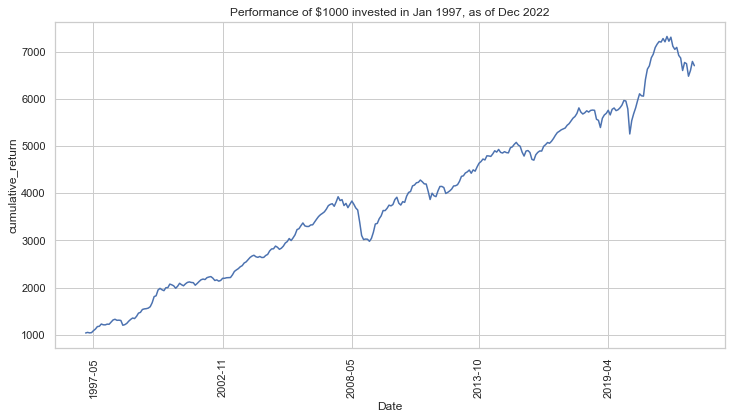

In [268]:
# Plot the line graph
plt.figure(figsize=(12, 6))
plt.title("Performance of $1000 invested in Jan 1997, as of Dec 2022")
sns.lineplot(data = return_df, x = 'Date', y = 'cumulative_return')
x_labels = ["1997-05", "2002-11", "2008-05", "2013-10", "2019-04"]
x_locations = [4, 70, 136, 201, 267]
plt.xticks(x_locations, x_labels, rotation=90)
plt.show()

<Figure size 864x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Performance of $1000 invested in Jan 1997, as of Dec 2022')

No handles with labels found to put in legend.


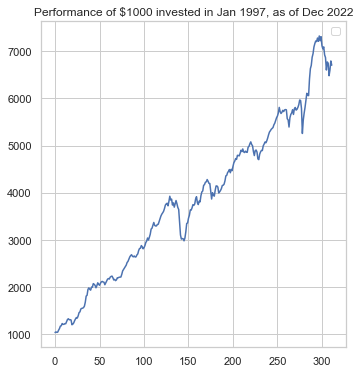

In [270]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Performance of $1000 invested in Jan 1997, as of Dec 2022")
#plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',

plt.plot(return_df['cumulative_return'])
plt.legend(loc='upper right')

In [108]:
import pandas as pd

# Load the wide format data from the Excel file
wide_format_data = pd.read_excel('data.xlsx', sheet_name='HedgeFund', header=1, index_col=None)
wide_format_data = hedgefund_df[:-3]
wide_format_data = hedgefund_df.rename(columns={hedgefund_df.columns[0]: "year"})

# Rename the first column to "year"
wide_format_data = wide_format_data.rename(columns={wide_format_data.columns[0]: "year"})

# Convert the wide format data into a long format dataframe
long_format_data = pd.melt(wide_format_data, id_vars='year', value_vars=wide_format_data.columns[1:], var_name='month', value_name='value')

# Combine 'year' and 'month' into a single column
long_format_data['datetime'] = pd.to_datetime(long_format_data['year'].astype(str) + long_format_data['month'], format='%Y%B')

# Format 'datetime' into a string with the desired format
long_format_data['datetime'] = long_format_data['datetime'].dt.strftime('%Y%m')

# Rename the 'datetime' column
long_format_data = long_format_data.rename(columns={'datetime': 'yyyymm'})

# Reorder columns
long_format_data = long_format_data[['yyyymm', 'value']]

# Reset index
long_format_data = long_format_data.reset_index(drop=True)

# Print the final long format dataframe
print(long_format_data)

ValueError: time data '1997.0Jan' does not match format '%Y%B' (match)

In [90]:
# Connect to the databases and create the output database
hedgefund_conn = sqlite3.connect("hedgefund.db")
rfasset_conn = sqlite3.connect("rfasset.db")
output_conn = sqlite3.connect("output.db")

# Load the data from the hedgefund database into a pandas dataframe
hedgefund_df = pd.read_sql_query("SELECT * FROM hf_wide", hedgefund_conn)

# Add a 'Date' column to the hedgefund dataframe if it is not present
if 'Date' not in hedgefund_df.columns:
    hedgefund_df['Date'] = pd.date_range(start='1/1/1986', end='12/31/2022', freq='M')

# Transform the hedgefund data into the long format and store it in the output database
hedgefund_df = pd.melt(hedgefund_df, id_vars=["Date"], var_name="Year", value_name="HedgeFund_Return")
hedgefund_df.to_sql("hf_long", output_conn, if_exists="replace", index=False)

# Load the data from the riskfreeasset database into a pandas dataframe
rfreeasset_df = pd.read_sql_query("SELECT * FROM rf_long", rfasset_conn)

# Merge the hedgefund and riskfreeasset data on the Date column and store it in the output database
merged_df = pd.merge(hedgefund_df, riskfreeasset_df, on="Date", how="left")
merged_df.to_sql("merged", output_conn, if_exists="replace", index=False)

# Query the merged data to make sure it was stored correctly
print(pd.read_sql_query("SELECT * FROM merged", output_conn))

ValueError: Length of values (444) does not match length of index (26)

In [ ]:
# Map the values in the 'month' column to the corresponding month names
month_map = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}
#long_hedgefund_df['Month'] = long_hedgefund_df['Month'].map(month_map)